# Model NPZD
Implementation of a NPZD based on the paper 'Internal dynamics of NPZD type ecosystem models'

Model equations:
\begin{align}
\frac{\partial N}{\partial t}&=-J(N,I)P+\phi_{z}Z+\gamma_{m}D \\
\frac{\partial P}{\partial t}&=(J(N,I)-\phi_{P})P-G(\epsilon,g,P)Z \\
\frac{\partial Z}{\partial t}&=(\beta G(\epsilon,g,P)-\phi_{z}-\phi^{*}_{Z}Z)Z\\
\frac{\partial D}{\partial t}&=\phi_{P}P+((1-\beta)G(\epsilon,g,P)+\phi^{*}_{Z}Z)Z-\gamma_{m}D
\end{align}
With:
\begin{align}
J(N,I)&=\mu_{m}\cdot f_{N}(N) \cdot f_{I}(I)=\mu_{m} \cdot \frac{N}{k_{N}+N} \cdot \frac{I}{k_{I}+I} \\
G(\epsilon,g,P)&=\frac{g \epsilon P^{2}}{g+\epsilon P^{2}}
\end{align}


In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def phyto_growth(mum,kn,ki,N,I):
    return mum*(N/(kn+N))*(I/(ki+I))
    
def grazing_growth(g,epsilon,P):
    return (g*epsilon*(P**2))/(g+epsilon*(P**2))

def compute_derivatives(N,P,Z,D,I,beta,mum,phip,phipqua,epsilon,g,phiz,phizqua,gammam,kn,ki):
    derivatives=[]
    Nderivative=-phyto_growth(mum,kn,ki,N,I)*P+phiz*Z+gammam*D
    derivatives.append(Nderivative)
    Pderivative=(phyto_growth(mum,kn,ki,N,I)-phip)*P-grazing_growth(g,epsilon,P)*Z
    derivatives.append(Pderivative)
    Zderivative=(beta*grazing_growth(g,epsilon,P)-phiz-phizqua*Z)*Z
    derivatives.append(Zderivative)
    Dderivative=phip*P+((1-beta)*grazing_growth(epsilon,g,P)+phizqua*Z)*Z-gammam*D
    derivatives.append(Dderivative)
    return derivatives

def solution_euler(N,P,Z,D,I,beta,mum,phip,phipqua,epsilon,g,phiz,phizqua,gammam,kn,ki,timestep):
    derivatives=compute_derivatives(N,P,Z,D,I,beta,mum,phip,phipqua,epsilon,g,phiz,phizqua,gammam,kn,ki)
    Nt=N+timestep*derivatives[0]
    Pt=P+timestep*derivatives[1]
    Zt=Z+timestep*derivatives[2]
    Dt=D+timestep*derivatives[3]
    return Nt,Pt,Zt,Dt

def model(N,P,Z,D,I,beta,mum,phip,phipqua,epsilon,g,phiz,phizqua,gammam,kn,ki,timestep,num_iter):
    N_vec=[]
    P_vec=[]
    Z_vec=[]
    D_vec=[]
    N_vec.append(N)
    P_vec.append(P)
    Z_vec.append(Z)
    D_vec.append(D)
    No=N
    Po=P
    Zo=Z
    Do=D
    for i in range(num_iter):
        Nt,Pt,Zt,Dt=solution_euler(No,Po,Zo,Do,I,beta,mum,phip,phipqua,epsilon,g,phiz,phizqua,gammam,kn,ki,timestep)
        N_vec.append(Nt)
        P_vec.append(Pt)
        Z_vec.append(Zt)
        D_vec.append(Dt)
        No=Nt
        Po=Pt
        Zo=Zt
        Do=Dt
    return N_vec,P_vec,Z_vec,D_vec

In [7]:
# MAKE THIS CLEARER

# Model values
Cref=1.066 # Growth coefficient of phytoplancton
c=1 # Growth coefficient of phytoplancton
beta=0.925 # Assimilation coefficient of zooplankton
alpha=0.256 # Slope of photoshynthesis vs linght intensity
mum=0.270 # Phytoplancton growth rate
phip=0.04 # Phytoplancton linear mortality
phipqua=0 # Phytoplancton quadratic mortality
epsilon=1.6 # Grazing encounter rate
g=1.575 # Maximum grazing rate
phiz=0.01 # Phytoplancton linear mortality
phizqua=0 # Phytoplancton quadratic mortality
gammam=0.048 # Detritus remineralization rate
kn=0.7 # Half saturation constant for NO3 uptake
ki=0.5 # Half saturation constant for light

I=2 # Light initial value

# Simulation values
timestep=0.1
num_iter=4000

# Initial values
mult = 5
N=0.9 * mult# Nutrients
P=1 * mult  # Phytoplancton
Z=0.7 * mult # Zooplancton
D=0.1 *mult # Detritus

In [8]:
N_vec,P_vec,Z_vec,D_vec=model(N,P,Z,D,I,beta,mum,phip,phipqua,epsilon,g,phiz,phizqua,gammam,kn,ki,timestep,num_iter)

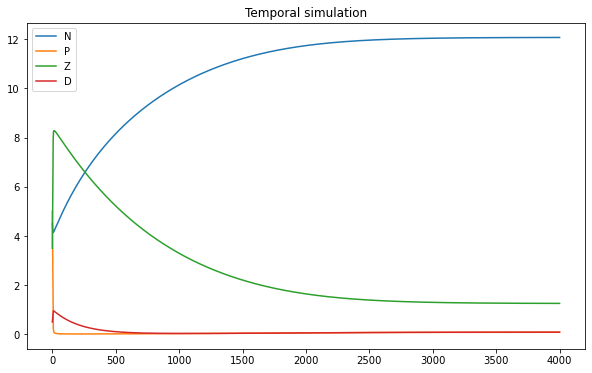

In [9]:
plt.figure(figsize=(10, 6))
plt.title('Temporal simulation')
ix = np.arange(num_iter+1)
plt.plot(ix, N_vec,label="N")
plt.plot(ix, P_vec,label="P")
plt.plot(ix, Z_vec,label="Z")
plt.plot(ix, D_vec,label="D")
plt.legend()
plt.show()

### Misc

Implementation of a predator prey model

$\begin{cases} \dot{N}=N*(a-b*P) \\ \dot{P}=P*(c*N-d) \end{cases}$

In [77]:
import numpy as np
import matplotlib.pyplot as plt

In [147]:
# Data containers
n_steps = 10000*3
N = np.zeros(n_steps)
P = np.zeros(n_steps)
# Initial values
N[0] = 0.2
P[0] = 0.8

In [148]:
dt = 0.0001

In [149]:
# Params
a = 60
b = 180
c = 80
d = 20

In [151]:
for i in range(n_steps-1):
    dn = N[i]*(a-b*P[i])
    dp = P[i]*(c*N[i]-d)
    if np.isinf(dn):
        print(i)
        break
    N[i+1] = N[i]*(1+dn*dt)
    P[i+1] = P[i]*(1+dp*dt)

First constant: 0.33, second constant: 0.25


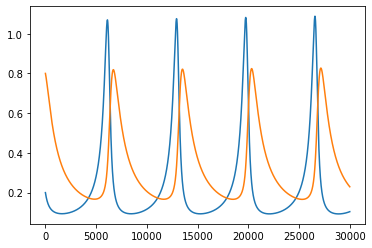

In [156]:
# TODO: Improve visualizations
print(f"First constant: {a/b:.2f}, second constant: {d/c:.2f}")
plt.plot(N[:i])
plt.plot(P[:i])